# DAY 08 -- The Physics of Code (Time Complexity)

In [1]:
import time                         # For measuring execution time
import random                       # For sampling and shuffling 
import numpy as np                  # For prepping data for plots
import matplotlib.pyplot as plt     # For plotting graphs -- visual comparisons

In [2]:
# Predefined list of sizes to test and plot times against
sizes_to_test = [   10_000, 50_000, 90_000, 
                    100_000, 300_000, 500_000, 700_000, 900_000,
                    1_000_000, 10_000_000]

### MC8.1 : The Linear Scan (*O(N)*)

In [3]:
def check_number_in_list(inp:int|list, target_num:int, return_found=None):
    """ Create a list of given size and check if target_num is in the list.
        Measure and print the time taken for the search in nanoseconds.     """
    # Create the list [if necessary]
    num_list = list(range(inp)) if isinstance(inp, int) else inp            
    list_size = len(num_list)

    start_time = time.time()
    found = target_num in num_list                  # Search for the number
    total_time = (time.time() - start_time)

    time_ns = f"{total_time*1_000_000_000:,.2f}"    # Convert to nanoseconds + format
    print(f"Time taken to search {list_size:>10,} numbers: {time_ns:>15} nanoseconds")
    if return_found is not None:
        return found if return_found else total_time

In [4]:
# Create a list of 10 million numbers. Check if `-5` is in the list.
my_list = list(range(10_000_000))
check_number_in_list(my_list, -5)

Time taken to search 10,000,000 numbers:  399,865,627.29 nanoseconds


> **Deep Dive:** Python performs a **Linear Search**. It loads index `0`, compares, loads index `1`, compares… all the way to 10 million. *Complexity: O(N)*. If data doubles, time doubles.

#### Demonstration of *O(N)* Time Complexity 

In [ ]:
time_results = [check_number_in_list(n, -5, False) for n in sizes_to_test]

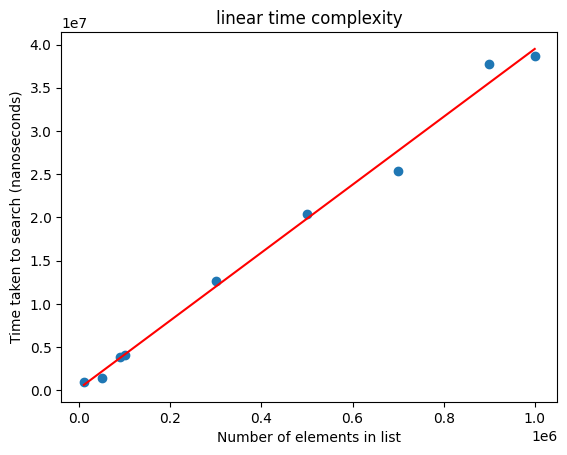

In [6]:
x_vals = np.array(sizes_to_test[:-1])
y_vals = np.array(time_results[:-1])*1_000_000_000    # Convert to nanoseconds
trendline = np.poly1d(np.polyfit(x_vals, y_vals, 1))
plt.scatter(x_vals, y_vals)
plt.plot(x_vals, trendline(x_vals), color='red')
plt.title("linear time complexity")
plt.xlabel("Number of elements in list")
plt.ylabel("Time taken to search (nanoseconds)")
plt.show()

Note: trendline graphing code found at [this stackoverflow answer](https://stackoverflow.com/a/41635626/6146136)

---

### MC8.2 : The Hash Lookup (*O(1)*)

In [7]:
def check_number_in_set(inp:int|list, number:int, return_found=None):
    """ Create a set of given size and check if number is in the set.
        Measure and print the time taken for the search in nanoseconds.     """
    # Create the set - initialize from range if integer, else from given iterable
    num_set = set(range(inp)) if isinstance(inp, int) else set(inp)
    set_size = len(num_set)
    
    start_time = time.time()
    found = number in num_set                       # Search for the number
    total_time = (time.time() - start_time)
    
    time_ns = f"{total_time*1_000_000_000:,.2f}"    # Convert to nanoseconds + format
    print(f"Time taken to search {set_size:>10,} numbers: {time_ns:>15} nanoseconds")
    if return_found is not None:
        return found if return_found else total_time

In [8]:
# Convert that list to a `set`. Check for `-5` again.
check_number_in_set(my_list, -5)

Time taken to search 10,000,000 numbers:            0.00 nanoseconds


> **Deep Dive:** Python runs `hash(-5)`, gets a memory address, and looks directly at that slot. It never scans the other items. *Complexity: O(1)*. Constant time, regardless of data size.

#### Demonstration of *O(1)* Time Complexity

In [9]:
for n in sizes_to_test[::2]: check_number_in_set(n, -5)

Time taken to search     10,000 numbers:            0.00 nanoseconds
Time taken to search     90,000 numbers:            0.00 nanoseconds
Time taken to search    300,000 numbers:            0.00 nanoseconds
Time taken to search    700,000 numbers:            0.00 nanoseconds
Time taken to search  1,000,000 numbers:            0.00 nanoseconds


No matter the set size, lookup always seems instantaneous.

---

### MC8.3 : The Insertion Trap (*O(N)*)

In [10]:
## insert vs append : functional comparison
list_x = list('abcdefg')
print("Original list:", list_x)

list_x.append('h[appended]')
print("After append :", list_x)

list_x.insert(0, '[inserted]a')
print("After insert :", list_x)

Original list: ['a', 'b', 'c', 'd', 'e', 'f', 'g']
After append : ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h[appended]']
After insert : ['[inserted]a', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h[appended]']


In [11]:
def check_time_avi(inp:int|list, new_i:any, return_time=False):
    """ Compare time taken to insert at index vs append at end of list. """
    # Create the list [if necessary]
    num_list_1 = list(range(inp)) if isinstance(inp, int) else inp            
    list_size = len(num_list_1)
    num_list_2 = num_list_1.copy()    # To ensure all operations on same initial list
    num_list_3 = num_list_1.copy()    # To ensure all operations on same initial list

    # Time append
    start_time = time.time()
    num_list_1.append(new_i)
    append_time = (time.time() - start_time)

    # Time insert - at start (0) 
    start_time = time.time()
    num_list_2.insert(0, new_i)
    insert_time_1 = (time.time() - start_time)

    # Time insert - at end (len)
    start_time = time.time()
    num_list_3.insert(list_size, new_i)
    insert_time_2 = (time.time() - start_time)

    append_ns = f"{append_time*1_000_000_000:,.2f}"    # Convert to nanoseconds + format
    insert_ns_1 = f"{insert_time_1*1_000_000_000:,.2f}"    # Convert to nanoseconds + format
    insert_ns_2 = f"{insert_time_2*1_000_000_000:,.2f}"    # Convert to nanoseconds + format
    print(  f"List with {list_size:>12,} elements --> Append time: {append_ns:>15} ns | "
            f"Insert time (start): {insert_ns_1:>15} ns | Insert time (end): {insert_ns_2:>15} ns" )
    
    if return_time:
        return append_time, insert_time_1, insert_time_2    

In [51]:
# Compare `list.append(x)` vs `list.insert(0, x)`. 
time_results_avi = [check_time_avi(n*10, -5, True) for n in sizes_to_test[::3]] 


List with      100,000 elements --> Append time:            0.00 ns | Insert time (start):    1,001,596.45 ns | Insert time (end):            0.00 ns
List with    1,000,000 elements --> Append time:    5,045,413.97 ns | Insert time (start):    5,385,875.70 ns | Insert time (end):    5,022,048.95 ns
List with    7,000,000 elements --> Append time:   28,743,743.90 ns | Insert time (start):   37,201,642.99 ns | Insert time (end):   24,846,076.97 ns
List with  100,000,000 elements --> Append time:  636,034,250.26 ns | Insert time (start):  585,107,088.09 ns | Insert time (end):  395,454,406.74 ns


> **Deep Dive:** `append()` puts data in the next empty memory slot (*O(1)*). `insert(0, x)` forces Python to **shift every existing item one step to the right in memory** to make room. *Result:* Inserting at the start of a large list is catastrophic for performance.

#### Graphical Comparison

In [ ]:
time_results_avi = [check_time_avi(n*10, -5, True) for n in sizes_to_test] 

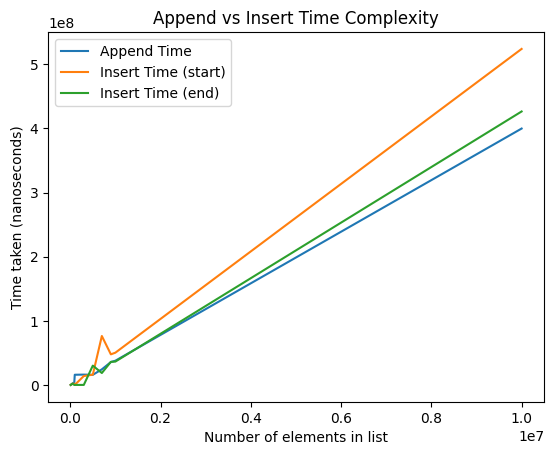

In [50]:
y_vals = [np.array(t)*1_000_000_000 for t in zip(*time_results_avi)]
x_vals = np.array(sizes_to_test)*10
plt.plot(sizes_to_test, y_vals[0], label='Append Time')
plt.plot(sizes_to_test, y_vals[1], label='Insert Time (start)')
plt.plot(sizes_to_test, y_vals[2], label='Insert Time (end)')
plt.title("Append vs Insert Time Complexity")
plt.xlabel("Number of elements in list")
plt.ylabel("Time taken (nanoseconds)")
plt.legend()
plt.show()

Note how the time to insert at the start of the list increases at a much higher rate than the time to append (or even to insert at the end). So `list.insert(0, x)` rapidly becomes more significantly inefficient, espicially for large lists.

---

### MC8.4 : The Queue Bottleneck (Pop)

In [14]:
def check_time_pvp(inp:int|list, return_time=False):
    """ Compare time taken to pop from start vs pop from end of list. """
    # Create the list [if necessary]
    num_list_1 = list(range(inp)) if isinstance(inp, int) else inp            
    list_size = len(num_list_1)
    num_list_2 = num_list_1.copy()    # To ensure both operations on same initial list

    # Time pop - from end (len-1)
    start_time = time.time()
    num_list_1.pop()
    pop_time_1 = (time.time() - start_time)

    # Time pop - from start (0) 
    start_time = time.time()
    num_list_2.pop(0)
    pop_time_2 = (time.time() - start_time)

    pop_ns_1 = f"{pop_time_1*1_000_000_000:,.2f}"    # Convert to nanoseconds + format
    pop_ns_2 = f"{pop_time_2*1_000_000_000:,.2f}"    # Convert to nanoseconds + format
    print(  f"List with {list_size:>10,} elements --> \t"
            f"Pop time (end): {pop_ns_1:>5} ns | Pop time (start): {pop_ns_2:>15} ns" )
    
    if return_time:
        return pop_time_1, pop_time_2

In [52]:
# Compare `list.pop()` vs `list.pop(0)`
for n in sizes_to_test[::3]: check_time_pvp(n*10, True)

List with    100,000 elements --> 	Pop time (end):  0.00 ns | Pop time (start):    1,049,995.42 ns
List with  1,000,000 elements --> 	Pop time (end):  0.00 ns | Pop time (start):    2,475,023.27 ns
List with  7,000,000 elements --> 	Pop time (end):  0.00 ns | Pop time (start):   10,422,945.02 ns
List with 100,000,000 elements --> 	Pop time (end):  0.00 ns | Pop time (start):  157,806,396.48 ns


> **Deep Dive:** `.pop()` removes the last item (*O(1)*). `.pop(0)` removes the first item, requiring a **left shift** of all remaining items to fill the gap (*O(N)*).

In [53]:
# Fix: Use `collections.deque` for fast First-In-First-Out queues.
from collections import deque
my_deque = deque(range(10_000_000))

start_time = time.time()
my_deque.popleft()          # Remove one element from start (left)
pop_ns = f"{(time.time() - start_time)*1_000_000_000:,.2f}" 
print(f"Time taken to popleft from deque of 10,000,000 elements: {pop_ns:>15} ns")

my_deque.appendleft(-5)     # To restore original size
start_time = time.time()
my_deque.pop()              # Remove one element from end (right)
pop_ns = f"{(time.time() - start_time)*1_000_000_000:,.2f}" 
print(f"Time taken to pop [right] from deque of 10,000,000 elements: {pop_ns:>11} ns")

Time taken to popleft from deque of 10,000,000 elements:            0.00 ns
Time taken to pop [right] from deque of 10,000,000 elements:        0.00 ns


---

### MC8.5 : The String Builder ($O(N^2)$)

In [17]:
## String vs List for concatenation
str_x = "abcdefg"
print(f"Original string:       {str_x!r} at id={id(str_x)}")
str_x += 'h'
print(f"After string concat:  {str_x!r} at id={id(str_x)}")

list_x = list('abcdefg')
print(f"\nOriginal list:          {list_x!r} at id={id(list_x)}")
list_x += ['h']
print(f"After list concat: {list_x!r} at id={id(list_x)}")

## Note that the id of the list does not change, but the id of the string does

Original string:       'abcdefg' at id=1796009074800
After string concat:  'abcdefgh' at id=1796005665904

Original list:          ['a', 'b', 'c', 'd', 'e', 'f', 'g'] at id=1796009146432
After list concat: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'] at id=1796009146432


In [18]:
def check_concat_time_svl(inp:int, return_time=False):
    """ Compare time taken to concatenate to string vs list. """

    s = ""
    start_time_1 = time.time()
    for _ in range(inp):
        s += "a"
    str_time = time.time() - start_time_1
    str_ns = f"{str_time*1_000_000_000:,.2f}"

    l = []
    for _ in range(inp):
        l.append("a")
    start_time_2     = time.time()
    l_s = ''.join(l)
    list_time = time.time() - start_time_2
    list_ns = f"{list_time*1_000_000_000:,.2f}"

    start_time_3 = time.time()
    m_s = 'a'*inp
    mult_time = time.time() - start_time_3
    mult_ns = f"{mult_time*1_000_000_000:,.2f}"
    print(  f"Time to concatenate {inp:>10,} characters --> "
            f"String concat : {str_ns:>14} ns | "
            f"List join : {list_ns:>13} ns | "
            f"String multiply : {mult_ns:>5} ns" )
    
    if return_time:
        return str_time, list_time, mult_time

In [54]:
# Loop 10,000 times and add a character to a string using `s += "a"`.
time_results_svl = [check_concat_time_svl(n, return_time=True) for n in sizes_to_test[::3]]

Time to concatenate     10,000 characters --> String concat :   8,185,148.24 ns | List join :          0.00 ns | String multiply :  0.00 ns
Time to concatenate    100,000 characters --> String concat :  71,537,017.82 ns | List join :  2,038,955.69 ns | String multiply :  0.00 ns
Time to concatenate    700,000 characters --> String concat : 278,686,046.60 ns | List join : 23,529,529.57 ns | String multiply : 1,003,026.96 ns
Time to concatenate 10,000,000 characters --> String concat : 11,584,530,830.38 ns | List join : 182,122,945.79 ns | String multiply : 1,821,517.94 ns


> **Deep Dive:** Strings are **Immutable**. Every time you do `+=`, Python destroys the old string and creates a **brand-new**, larger one at a new memory address. *Fix:* Use `"".join(list_of_chars)`.

#### Graphical Comparison

In [ ]:
time_results_svl = [check_concat_time_svl(n, return_time=True) for n in sizes_to_test]

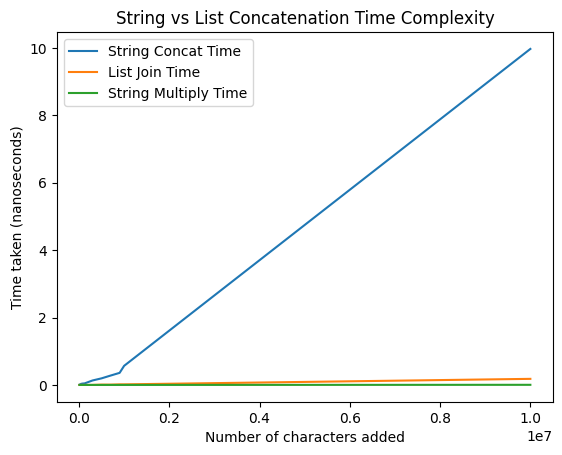

In [57]:
y_vals = [np.array(t) for t in zip(*time_results_svl)]
x_vals = np.array(sizes_to_test)
plt.plot(x_vals, y_vals[0], label='String Concat Time')
plt.plot(x_vals, y_vals[1], label='List Join Time')
plt.plot(x_vals, y_vals[2], label='String Multiply Time')
plt.title("String vs List Concatenation Time Complexity")
plt.xlabel("Number of characters added")
plt.ylabel("Time taken (nanoseconds)")
plt.legend()
plt.show()

---

### MC8.6 : The Length Trick (*O(1)*)

In [21]:
def check_time_len(inp:int|list, return_time=False):
    """ Check time taken to get length of list. """
    l = list(range(inp)) if isinstance(inp, int) else inp
    
    start_time = time.time()
    len_l = len(l)
    len_time = time.time() - start_time
    len_ns = f"{len_time*1_000_000_000:,.2f}"
    print(f"Time taken to get length of list with {len_l:>11,} elements: "
          f"{len_ns:>5} nanoseconds")

    if return_time:
        return len_time

In [22]:
# Call `len()` on a list of 1 billion items. ## Can't -- program hangs, 1b too large to create
for n in sizes_to_test[::3]: check_time_len(n*10)

Time taken to get length of list with     100,000 elements:  0.00 nanoseconds
Time taken to get length of list with   1,000,000 elements:  0.00 nanoseconds
Time taken to get length of list with   7,000,000 elements:  0.00 nanoseconds
Time taken to get length of list with 100,000,000 elements:  0.00 nanoseconds


> **Deep Dive:** You might expect Python to count items one by one. It doesn’t. The C-structure of a Python list maintains a metadata counter `ob_size`. `len()` simply reads this cached integer. It is instant (*O(1)*).

---

### MC8.7 : The Quadratic Nested Loop ($O(N^2)$)

In [23]:
# Find duplicates between two lists using nested `for` loops.
def check_time_nested_loops(list_size:int, return_time=False):
    """ Check time taken to find duplicates between two lists using nested for loops. """
    src_list = list(range(list_size*10))
    list_a = random.sample(src_list, list_size)
    list_b = random.sample(src_list[::-1], list_size)

    duplicates = []
    start_time = time.time()
    for a in list_a:
        for b in list_b:
            if a == b:
                duplicates.append(a)
    total_time = time.time() - start_time
    time_ms = f"{total_time*1_000:,.2f}"
    print(  f"Found {len(duplicates):>5,} duplicates between two lists of "
            f"size {list_size:>7,} in {time_ms:>11} milliseconds"   )
    
    if return_time: 
        return total_time

In [59]:
time_results_nl = [check_time_nested_loops(n//100, True) for n in sizes_to_test[:-1:3]]

Found     5 duplicates between two lists of size     100 in        1.99 milliseconds
Found   100 duplicates between two lists of size   1,000 in      189.86 milliseconds
Found   711 duplicates between two lists of size   7,000 in    6,481.22 milliseconds


> **Deep Dive:** For every item in List A, you scan all items in List B. `10,000 × 10,000 = 100,000,000` operations. This is the *most common cause of server timeouts*.

#### $O(N^2)$ Graph

In [ ]:
time_results_nl = [check_time_nested_loops(n//100, True) for n in sizes_to_test[:-2]]

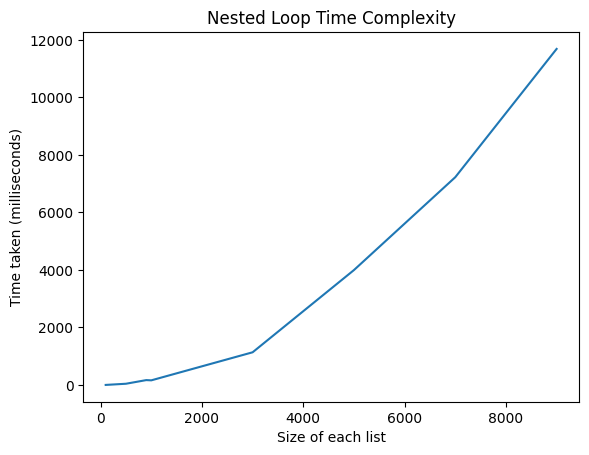

In [61]:
x_vals = np.array(sizes_to_test[:-2])//100  
y_vals = np.array(time_results_nl)*1_000    # Convert to milliseconds
plt.plot(x_vals, y_vals, label='Nested Loop Time')
plt.title("Nested Loop Time Complexity")
plt.xlabel("Size of each list") 
plt.ylabel("Time taken (milliseconds)")
plt.show()

---

### MC8.8 : The Sorting Cost ($O(N\log N)$)

In [26]:
# Sort a random list.
def check_time_sort(inp:int|list, return_time=False):
    """ Check time taken to sort a list. """
    l = list(range(inp)) if isinstance(inp, int) else inp
    random.shuffle(l)

    start_time = time.time()
    l.sort()
    total_time = time.time() - start_time
    time_us = f"{total_time*1_000_000:,.2f}"
    print(f"Time taken to sort list of size {len(l):>10,}: {time_us:>11} microseconds")

    if return_time:
        return total_time

In [62]:
time_results_sort = [check_time_sort(n//10, True) for n in sizes_to_test[::3]]

Time taken to sort list of size      1,000:      674.25 microseconds
Time taken to sort list of size     10,000:    3,633.98 microseconds
Time taken to sort list of size     70,000:   29,529.81 microseconds
Time taken to sort list of size  1,000,000:  933,697.94 microseconds


> **Deep Dive:** Python uses **Timsort** (a hybrid of Merge Sort and Insertion Sort). It is faster than $O(N^2)$ but slower than $O(N)$. Avoid sorting inside loops!

#### Graphed Demonstration

In [ ]:
time_results_sort = [check_time_sort(n//10, True) for n in sizes_to_test[:-2]]

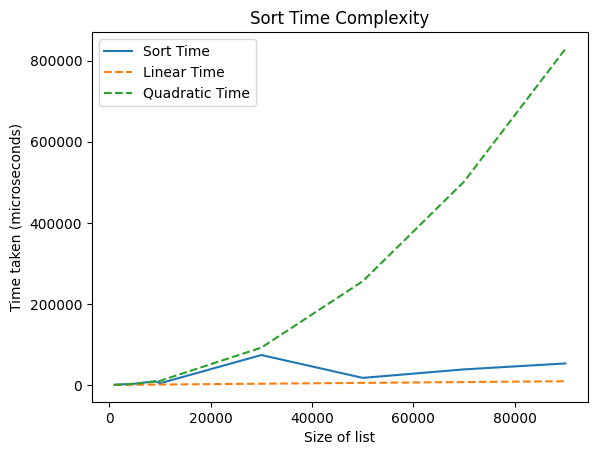

In [82]:
x_vals = np.array(sizes_to_test[:-2])//10
y_vals = np.array(time_results_sort)*1_000_000    # Convert to microseconds 
x0, y0, s = x_vals[0], y_vals[0], .2        # scaling factor for trendlines

plt.plot(x_vals, y_vals, label='Sort Time')
plt.plot(x_vals, (s*y0 * (x_vals / x0)), "--", label='Linear Time')
plt.plot(x_vals, (s*y0 * (x_vals / x0) ** 2), "--", label='Quadratic Time')
plt.title("Sort Time Complexity")
plt.xlabel("Size of list")
plt.ylabel("Time taken (microseconds)")
plt.legend()
plt.show()

[Because it's not rendering properly on github:]
![Sort Complexity Graph](sort_complexity_graph.png)

---

### MC8.9 : The Dictionary Creator ($O(N)$)

In [29]:
# Measure the time to create a dictionary from a list vs searching it.
def check_time_dvl(inp:int|list, target_num:int, return_time=False):
    """ Compare time taken to create a dictionary from a list vs searching it. """
    # Create the list [if necessary]
    num_list = list(range(inp)) if isinstance(inp, int) else inp            
    list_size = len(num_list)

    # Time to create dictionary
    start_time = time.time()
    num_dict = {num: True for num in num_list}
    dict_creation_time = time.time() - start_time
    dict_creation_ms = f"{dict_creation_time*1_000:,.2f}"

    ## Time to search in list # [just for comparison]
    start_time = time.time()
    found_in_list = target_num in num_list
    list_search_time = time.time() - start_time
    list_search_ms = f"{list_search_time*1_000:,.2f}"

    # Time to search in dictionary
    start_time = time.time()
    found_in_dict = target_num in num_dict
    dict_search_time = time.time() - start_time
    dict_search_ms = f"{dict_search_time*1_000:,.2f}"

    print(  f"For {list_size:>10,} elements --> "
            f"Dict creation took {dict_creation_ms:>7} ms | "
            f"List search took {list_search_ms:>5} ms | "
            f"Dict search took {dict_search_ms:>4} ms" )
    
    if return_time:
        return dict_creation_time, list_search_time, dict_search_time

In [84]:
time_results_dvl = [check_time_dvl(n, -5, True) for n in sizes_to_test[:-1:3]] 

For     10,000 elements --> Dict creation took    2.92 ms | List search took  0.00 ms | Dict search took 0.00 ms
For    100,000 elements --> Dict creation took   34.00 ms | List search took  5.00 ms | Dict search took 0.00 ms
For    700,000 elements --> Dict creation took  222.47 ms | List search took 21.96 ms | Dict search took 0.00 ms


> **Deep Dive:** * Searching is $O(1)$ but **building** the dictionary is $O(N)$ because Python must calculate a hash for every item *and* allocate memory buckets.

#### Graphical Comparison

In [ ]:
time_results_dvl = [check_time_dvl(n, -5, True) for n in sizes_to_test] 

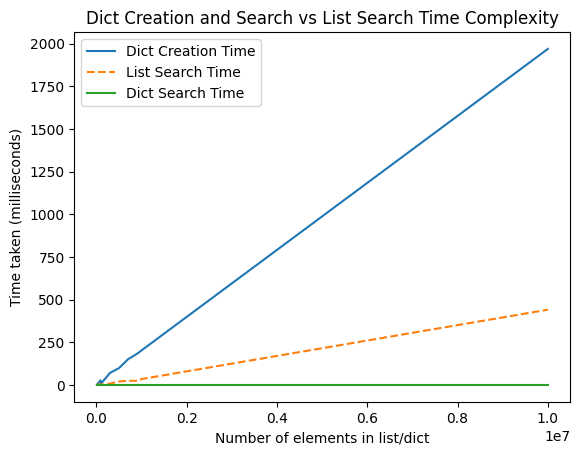

In [86]:
x_vals = np.array(sizes_to_test)
y_vals = [np.array(t)*1_000 for t in zip(*time_results_dvl)]  # Convert to milliseconds
plt.plot(x_vals, y_vals[0], label='Dict Creation Time') 
plt.plot(x_vals, y_vals[1], "--", label='List Search Time')
plt.plot(x_vals, y_vals[2], label='Dict Search Time')
plt.title("Dict Creation and Search vs List Search Time Complexity")
plt.xlabel("Number of elements in list/dict")
plt.ylabel("Time taken (milliseconds)")
plt.legend()
plt.show()

---

### MC8.10 : The Slice Copy ($O(k)$)

In [32]:
def check_time_slices(inp:int|list, slice_size:int, return_time=False):
    """ Check time taken to create slices of a list. """
    data = list(range(inp)) if isinstance(inp, int) else inp
    list_size = len(data)

    start_time = time.time()
    slice_1 = data[:slice_size]
    slice_time = time.time() - start_time
    slice_ns = f"{slice_time*1_000_000_000:,.2f}" 

    print(  f"For a list with {list_size:>10,} elements --> "
            f"Slicing {slice_size:>10,} took {slice_ns:>17} ns" )
    if return_time:
        return slice_time

In [33]:
# Slice a massive list: `data[0:5000]`.
check_time_slices(1_000_000, 5000)
check_time_slices(1_000_000, 100_000)
check_time_slices(5_000_000, 100_000)

For a list with  1,000,000 elements --> Slicing      5,000 took              0.00 ns
For a list with  1,000,000 elements --> Slicing    100,000 took              0.00 ns
For a list with  5,000,000 elements --> Slicing    100,000 took              0.00 ns


> **Deep Dive:** Slicing is not free. It allocates new memory and copies the data references. Slicing a huge chunk takes time proportional to the slice size (*`k`*).

#### Graphical Comparison

In [ ]:
time_results_s2 = [check_time_slices(n, n//2, True) for n in sizes_to_test]
time_results_s1 = [check_time_slices(n, n//10, True) for n in sizes_to_test]

In [96]:
x_vals = np.array(sizes_to_test)
y_vals_1 = np.array(time_results_s1)*1_000_000  # Convert to microseconds
y_vals_2 = np.array(time_results_s2)*1_000_000  # Convert to microseconds

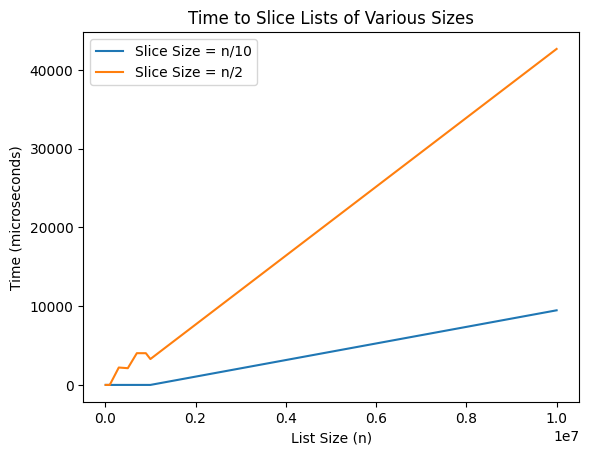

In [97]:
plt.plot(x_vals, y_vals_1, label='Slice Size = n/10')
plt.plot(x_vals, y_vals_2, label='Slice Size = n/2')
plt.xlabel('List Size (n)')
plt.ylabel('Time (microseconds)')
plt.title('Time to Slice Lists of Various Sizes')
plt.legend()
plt.show()

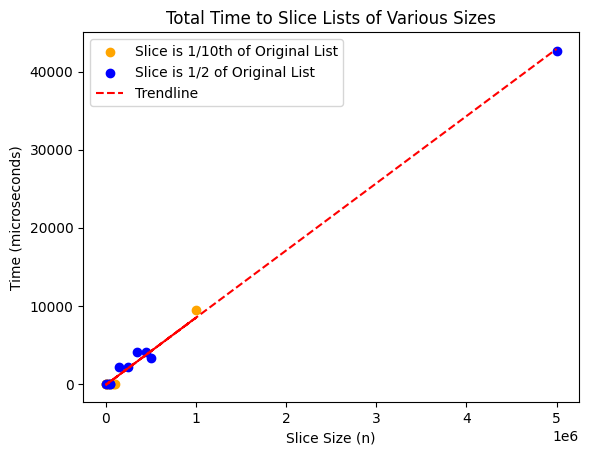

In [98]:
x_vals_combined = np.concatenate((x_vals//10, x_vals//2), axis=0)
y_vals_combined = np.concatenate((y_vals_1, y_vals_2), axis=0)    # Already in microseconds
trendline = np.poly1d(np.polyfit(x_vals_combined, y_vals_combined, 1))

plt.scatter(x_vals//10, y_vals_1, 
            color="orange", label='Slice is 1/10th of Original List')
plt.scatter(x_vals//2, y_vals_2, 
            color="blue", label='Slice is 1/2 of Original List')
plt.plot(   x_vals_combined, trendline(x_vals_combined), 
            "--", label='Trendline', color='red')
plt.xlabel('Slice Size (n)')
plt.ylabel('Time (microseconds)')
plt.title('Total Time to Slice Lists of Various Sizes')
plt.legend()
plt.show()

---